In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import pickle
import matplotlib.pyplot as plt
import gcsfs
fs = gcsfs.GCSFileSystem()

In [12]:
#Search LEAP persistent bucket
#fs.ls('gs://leap-persistent/')

# 9-member testbed

In [2]:
mems_dict = {'ACCESS-ESM1-5': ['member_r4i1p1f1'], 'CESM2': ['member_r10i1p1f1'], 'CESM2-WACCM': ['member_r1i1p1f1'],
             'CMCC-ESM2': ['member_r1i1p1f1'], 'CanESM5': ['member_r10i1p2f1'], 'CanESM5-CanOE': ['member_r1i1p2f1'],
             'GFDL-ESM4': ['member_r1i1p1f1'], 'MPI-ESM1-2-LR': ['member_r11i1p1f1'], 'UKESM1-0-LL': ['member_r1i1p1f2']}

## Bring in reconstructions and testbed truth

### nMSE_Run

In [3]:
datasets_ens_2022_nmse_9 = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        truth_path = f'gs://leap-persistent/abbysh/pco2_all_members_1982-2022/post00_regridded_members/{ens}/{member}/{ens}.{member.split("_")[-1]}.Omon.zarr'
        recon_path = f"gs://leap-persistent/abbysh/pco2_gridsearch_1982-2022/post02_xgb_1982-2022_nmse_outputs/reconstructions/{ens}/{member}/xg_recon_pCO2_{ens}_{member}_mon_1x1_198202_202212.zarr"
        kwargs = dict(chunks={'time':-1})
                    
        truth = xr.open_dataset(truth_path, engine='zarr',**kwargs).spco2 
        unseen = xr.open_dataset(recon_path, engine='zarr',**kwargs).pCO2_recon_unseen 

#         # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        unseen = unseen.assign_coords(status='unseen')
        
#         # make sure they have the same time coordinates
        truth = truth.assign_coords(time=unseen['time'].data)
        
        member_ds = xr.concat([truth, unseen], dim='status')
        
#         # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens_2022_nmse_9.append(ds_ens)

### Shuffled runs

In [4]:
datasets_ens_2022_shuffled_9 = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        truth_path = f'gs://leap-persistent/abbysh/pco2_all_members_1982-2022/post00_regridded_members/{ens}/{member}/{ens}.{member.split("_")[-1]}.Omon.zarr'
        recon_path = f"gs://leap-persistent/abbysh/pco2_shuffled_socat/post02_xgb_1982-2022_nmse_outputs/reconstructions/{ens}/{member}/xg_recon_pCO2_{ens}_{member}_mon_1x1_198202_202212.zarr"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, engine='zarr',**kwargs).spco2 
        unseen = xr.open_dataset(recon_path, engine='zarr',**kwargs).pCO2_recon_unseen 

#         # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        unseen = unseen.assign_coords(status='unseen')
        
#         # make sure they have the same time coordinates
        truth = truth.assign_coords(time=unseen['time'].data)
        
        member_ds = xr.concat([truth, unseen], dim='status')
        
#         # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens_2022_shuffled_9.append(ds_ens)

In [5]:
datasets_ens_2022_shuffled_9_2 = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        truth_path = f'gs://leap-persistent/abbysh/pco2_all_members_1982-2022/post00_regridded_members/{ens}/{member}/{ens}.{member.split("_")[-1]}.Omon.zarr'
        recon_path = f"gs://leap-persistent/abbysh/pco2_shuffled_socat/post02_xgb_1982-2022_nmse_outputs_run2/reconstructions/{ens}/{member}/xg_recon_pCO2_{ens}_{member}_mon_1x1_198202_202212.zarr"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, engine='zarr',**kwargs).spco2 
        unseen = xr.open_dataset(recon_path, engine='zarr',**kwargs).pCO2_recon_unseen 

#         # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        unseen = unseen.assign_coords(status='unseen')
        
#         # make sure they have the same time coordinates
        truth = truth.assign_coords(time=unseen['time'].data)
        
        member_ds = xr.concat([truth, unseen], dim='status')
        
#         # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens_2022_shuffled_9_2.append(ds_ens)

In [6]:
datasets_ens_2022_shuffled_9_3 = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        truth_path = f'gs://leap-persistent/abbysh/pco2_all_members_1982-2022/post00_regridded_members/{ens}/{member}/{ens}.{member.split("_")[-1]}.Omon.zarr'
        recon_path = f"gs://leap-persistent/abbysh/pco2_shuffled_socat/post02_xgb_1982-2022_nmse_outputs_run3/reconstructions/{ens}/{member}/xg_recon_pCO2_{ens}_{member}_mon_1x1_198202_202212.zarr"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, engine='zarr',**kwargs).spco2 
        unseen = xr.open_dataset(recon_path, engine='zarr',**kwargs).pCO2_recon_unseen

#         # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        unseen = unseen.assign_coords(status='unseen')
        
#         # make sure they have the same time coordinates
        truth = truth.assign_coords(time=unseen['time'].data)
        
        member_ds = xr.concat([truth, unseen], dim='status')
        
#         # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens_2022_shuffled_9_3.append(ds_ens)

In [7]:
datasets_ens_2022_shuffled_9_4 = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        truth_path = f'gs://leap-persistent/abbysh/pco2_all_members_1982-2022/post00_regridded_members/{ens}/{member}/{ens}.{member.split("_")[-1]}.Omon.zarr'
        recon_path = f"gs://leap-persistent/abbysh/pco2_shuffled_socat/post02_xgb_1982-2022_nmse_outputs_run4/reconstructions/{ens}/{member}/xg_recon_pCO2_{ens}_{member}_mon_1x1_198202_202212.zarr"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, engine='zarr',**kwargs).spco2 
        unseen = xr.open_dataset(recon_path, engine='zarr',**kwargs).pCO2_recon_unseen 
#         # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        unseen = unseen.assign_coords(status='unseen')
        
#         # make sure they have the same time coordinates
        truth = truth.assign_coords(time=unseen['time'].data)
        
        member_ds = xr.concat([truth, unseen], dim='status')
        
#         # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens_2022_shuffled_9_4.append(ds_ens)

In [8]:
datasets_ens_2022_shuffled_9_5 = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        truth_path = f'gs://leap-persistent/abbysh/pco2_all_members_1982-2022/post00_regridded_members/{ens}/{member}/{ens}.{member.split("_")[-1]}.Omon.zarr'
        recon_path = f"gs://leap-persistent/abbysh/pco2_shuffled_socat/post02_xgb_1982-2022_nmse_outputs_run5/reconstructions/{ens}/{member}/xg_recon_pCO2_{ens}_{member}_mon_1x1_198202_202212.zarr"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, engine='zarr',**kwargs).spco2 
        unseen = xr.open_dataset(recon_path, engine='zarr',**kwargs).pCO2_recon_unseen 

#         # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        unseen = unseen.assign_coords(status='unseen')
        
#         # make sure they have the same time coordinates
        truth = truth.assign_coords(time=unseen['time'].data)
        
        member_ds = xr.concat([truth, unseen], dim='status')
        
#         # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens_2022_shuffled_9_5.append(ds_ens)

### Reconstruction Bias

#### nMSE_Run

In [12]:
model_mean_biases_2022_nmse_9 = []
for model in datasets_ens_2022_nmse_9:
    model_mean_bias_2022_nmse_9 = model.diff('status').sel(time=slice("1982-01-01",'2022-12-31')).groupby("time.year").mean(['n_member', 'time', 'ylat', 'xlon','status'])
    model_mean_biases_2022_nmse_9.append(model_mean_bias_2022_nmse_9.values)
testbed_mean_bias_2022_nmse_9 = np.mean(model_mean_biases_2022_nmse_9,axis=0)

In [20]:
#Calculate mean bias
#print(np.nanmean(testbed_mean_bias_2022_nmse_9))

#### Shuffled runs

In [13]:
model_mean_biases_2022_shuffled_9 = []
for model in datasets_ens_2022_shuffled_9:
    model_mean_bias_2022_shuffled_9 = model.diff('status').sel(time=slice("1982-01-01",'2022-12-31')).groupby("time.year").mean(['n_member', 'time', 'ylat', 'xlon','status'])
    model_mean_biases_2022_shuffled_9.append(model_mean_bias_2022_shuffled_9.values)
testbed_mean_bias_2022_shuffled_9 = np.mean(model_mean_biases_2022_shuffled_9,axis=0)

In [14]:
#Calculate mean bias
#print(np.nanmean(testbed_mean_bias_2022_shuffled_9))

In [15]:
model_mean_biases_2022_shuffled_9_2 = []
for model in datasets_ens_2022_shuffled_9_2:
    model_mean_bias_2022_shuffled_9_2 = model.diff('status').sel(time=slice("1982-01-01",'2022-12-31')).groupby("time.year").mean(['n_member', 'time', 'ylat', 'xlon','status'])
    model_mean_biases_2022_shuffled_9_2.append(model_mean_bias_2022_shuffled_9_2.values)
testbed_mean_bias_2022_shuffled_9_2 = np.mean(model_mean_biases_2022_shuffled_9_2,axis=0)

In [16]:
#Calculate mean bias
#print(np.nanmean(testbed_mean_bias_2022_shuffled_9_2))

In [17]:
model_mean_biases_2022_shuffled_9_3 = []
for model in datasets_ens_2022_shuffled_9_3:
    model_mean_bias_2022_shuffled_9_3 = model.diff('status').sel(time=slice("1982-01-01",'2022-12-31')).groupby("time.year").mean(['n_member', 'time', 'ylat', 'xlon','status'])
    model_mean_biases_2022_shuffled_9_3.append(model_mean_bias_2022_shuffled_9_3.values)
testbed_mean_bias_2022_shuffled_9_3 = np.mean(model_mean_biases_2022_shuffled_9_3,axis=0)

In [18]:
#Calculate mean bias
#print(np.nanmean(testbed_mean_bias_2022_shuffled_9_3))

In [19]:
model_mean_biases_2022_shuffled_9_4 = []
for model in datasets_ens_2022_shuffled_9_4:
    model_mean_bias_2022_shuffled_9_4 = model.diff('status').sel(time=slice("1982-01-01",'2022-12-31')).groupby("time.year").mean(['n_member', 'time', 'ylat', 'xlon','status'])
    model_mean_biases_2022_shuffled_9_4.append(model_mean_bias_2022_shuffled_9_4.values)
testbed_mean_bias_2022_shuffled_9_4 = np.mean(model_mean_biases_2022_shuffled_9_4,axis=0)

In [20]:
#Calculate mean bias
#print(np.nanmean(testbed_mean_bias_2022_shuffled_9_4))

In [21]:
model_mean_biases_2022_shuffled_9_5 = []
for model in datasets_ens_2022_shuffled_9_5:
    model_mean_bias_2022_shuffled_9_5 = model.diff('status').sel(time=slice("1982-01-01",'2022-12-31')).groupby("time.year").mean(['n_member', 'time', 'ylat', 'xlon','status'])
    model_mean_biases_2022_shuffled_9_5.append(model_mean_bias_2022_shuffled_9_5.values)
testbed_mean_bias_2022_shuffled_9_5 = np.mean(model_mean_biases_2022_shuffled_9_5,axis=0)

In [20]:
#Calculate mean bias
#print(np.nanmean(testbed_mean_bias_2022_shuffled_9_5))

## Figure 3

<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_18745/3555693518.py:13: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Reconstruction bias ($\mu atm$)', fontsize=20)


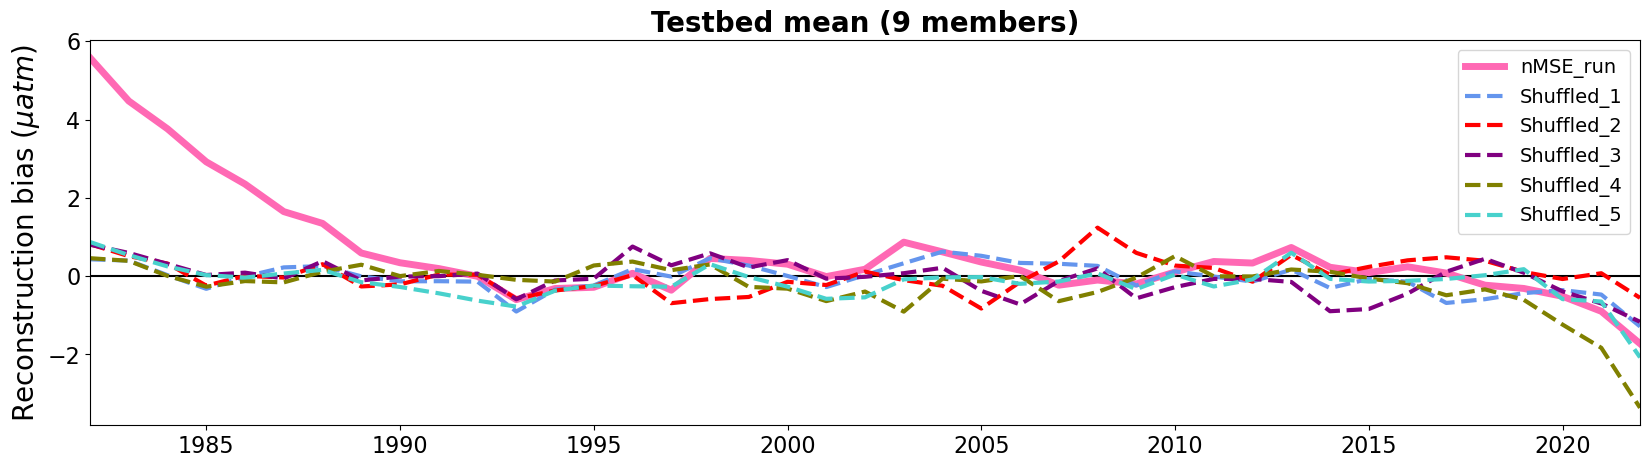

In [15]:
fig = plt.figure(figsize=(20,5))

plt.title('Testbed mean (9 members)', fontsize=20, fontweight="bold")

plt.plot(model_mean_bias_2022_nmse_9.year,testbed_mean_bias_2022_nmse_9,linewidth=5.0,c='hotpink',label='nMSE_run', linestyle='solid')#,alpha=0.5
plt.plot(model_mean_bias_2022_shuffled_9.year,testbed_mean_bias_2022_shuffled_9,linewidth=3.0,c='cornflowerblue',label='Shuffled_1', linestyle='dashed')#,dashes=(4, 1))#
plt.plot(model_mean_bias_2022_shuffled_9_2.year,testbed_mean_bias_2022_shuffled_9_2,linewidth=3.0,c='red',label='Shuffled_2', linestyle='dashed')#,dashes=(4, 1))#
plt.plot(model_mean_bias_2022_shuffled_9_3.year,testbed_mean_bias_2022_shuffled_9_3,linewidth=3.0,c='purple',label='Shuffled_3', linestyle='dashed')#,dashes=(4, 1))#
plt.plot(model_mean_bias_2022_shuffled_9_4.year,testbed_mean_bias_2022_shuffled_9_4,linewidth=3.0,c='olive',label='Shuffled_4', linestyle='dashed')#,dashes=(4, 1))#
plt.plot(model_mean_bias_2022_shuffled_9_5.year,testbed_mean_bias_2022_shuffled_9_5,linewidth=3.0,c='mediumturquoise',label='Shuffled_5', linestyle='dashed')#,dashes=(4, 1))#

plt.ylabel('Reconstruction bias ($\mu atm$)', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

plt.axhline(0,zorder=-10, color='black')
plt.xlim(model_mean_bias_2022_nmse_9.year[0],model_mean_bias_2022_nmse_9.year[-1]);
plt.legend(fontsize=14);

#fig.savefig("/home/jovyan/timeseries_bias_shuffled.jpg",dpi=300, bbox_inches="tight")

### SOCAT masks

In [42]:
socat_original = xr.open_dataset('gs://leap-persistent/abbysh/zarr_files_/socat_mask_feb1982-dec2022.zarr', engine='zarr')
socat_shuffled_1 = xr.open_dataset('gs://leap-persistent/abbysh/zarr_files_/shuffledyears_socat_mask_feb1982-dec2022.zarr', engine='zarr')
socat_shuffled_2 = xr.open_dataset('gs://leap-persistent/abbysh/zarr_files_/shuffledyears_socat_mask_feb1982-dec2022_2.zarr', engine='zarr')
socat_shuffled_3 = xr.open_dataset('gs://leap-persistent/abbysh/zarr_files_/shuffledyears_socat_mask_feb1982-dec2022_3.zarr', engine='zarr')
socat_shuffled_4 = xr.open_dataset('gs://leap-persistent/abbysh/zarr_files_/shuffledyears_socat_mask_feb1982-dec2022_4.zarr', engine='zarr')
socat_shuffled_5 = xr.open_dataset('gs://leap-persistent/abbysh/zarr_files_/shuffledyears_socat_mask_feb1982-dec2022_5.zarr', engine='zarr')

In [10]:
socat_original = xr.where((socat_original.socat_mask==0.),np.nan,socat_original.socat_mask)
socat_shuffled_1 = xr.where((socat_shuffled_1.socat_mask==0.),np.nan,socat_shuffled_1.socat_mask)
socat_shuffled_2 = xr.where((socat_shuffled_2.socat_mask==0.),np.nan,socat_shuffled_2.socat_mask)
socat_shuffled_3 = xr.where((socat_shuffled_3.socat_mask==0.),np.nan,socat_shuffled_3.socat_mask)
socat_shuffled_4 = xr.where((socat_shuffled_4.socat_mask==0.),np.nan,socat_shuffled_4.socat_mask)
socat_shuffled_5 = xr.where((socat_shuffled_5.socat_mask==0.),np.nan,socat_shuffled_5.socat_mask)

socat_original['time']=(socat_original.time.values)
socat_shuffled_1['time']=(socat_shuffled_1.time.values)
socat_shuffled_2['time']=(socat_shuffled_2.time.values)
socat_shuffled_3['time']=(socat_shuffled_3.time.values)
socat_shuffled_4['time']=(socat_shuffled_4.time.values)
socat_shuffled_5['time']=(socat_shuffled_5.time.values)

socat_original_annual = socat_original.groupby('time.year').count().sum(['ylat','xlon'])
socat_shuffled_annual_1 = socat_shuffled_1.groupby('time.year').count().sum(['ylat','xlon'])
socat_shuffled_annual_2 = socat_shuffled_2.groupby('time.year').count().sum(['ylat','xlon'])
socat_shuffled_annual_3 = socat_shuffled_3.groupby('time.year').count().sum(['ylat','xlon'])
socat_shuffled_annual_4 = socat_shuffled_4.groupby('time.year').count().sum(['ylat','xlon'])
socat_shuffled_annual_5 = socat_shuffled_5.groupby('time.year').count().sum(['ylat','xlon'])

In [23]:
# Calculate absolute bias
bias_original_nmse_abs = abs(testbed_mean_bias_2022_nmse_9)
bias_shuffled1_nmse_abs = abs(testbed_mean_bias_2022_shuffled_9)
bias_shuffled2_nmse_abs = abs(testbed_mean_bias_2022_shuffled_9_2)
bias_shuffled3_nmse_abs = abs(testbed_mean_bias_2022_shuffled_9_3)
bias_shuffled4_nmse_abs = abs(testbed_mean_bias_2022_shuffled_9_4)
bias_shuffled5_nmse_abs = abs(testbed_mean_bias_2022_shuffled_9_5)

## Figure S6

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:29: SyntaxWarning: invalid escape sequence '\m'
<>:37: SyntaxWarning: invalid escape sequence '\m'
<>:45: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:29: SyntaxWarning: invalid escape sequence '\m'
<>:37: SyntaxWarning: invalid escape sequence '\m'
<>:45: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_22693/4250719783.py:5: SyntaxWarning: invalid escape sequence '\m'
  axes[0, 0].set_xlabel('Absolute bias ($\mu atm$)', fontsize=14)#, fontweight='bold')
/tmp/ipykernel_22693/4250719783.py:13: SyntaxWarning: invalid escape sequence '\m'
  axes[0, 1].set_xlabel('Absolute bias ($\mu atm$)', fontsize=14)#, fontweight='bold')
/tmp/ipykernel_22693/4250719783.py:21: SyntaxWarnin

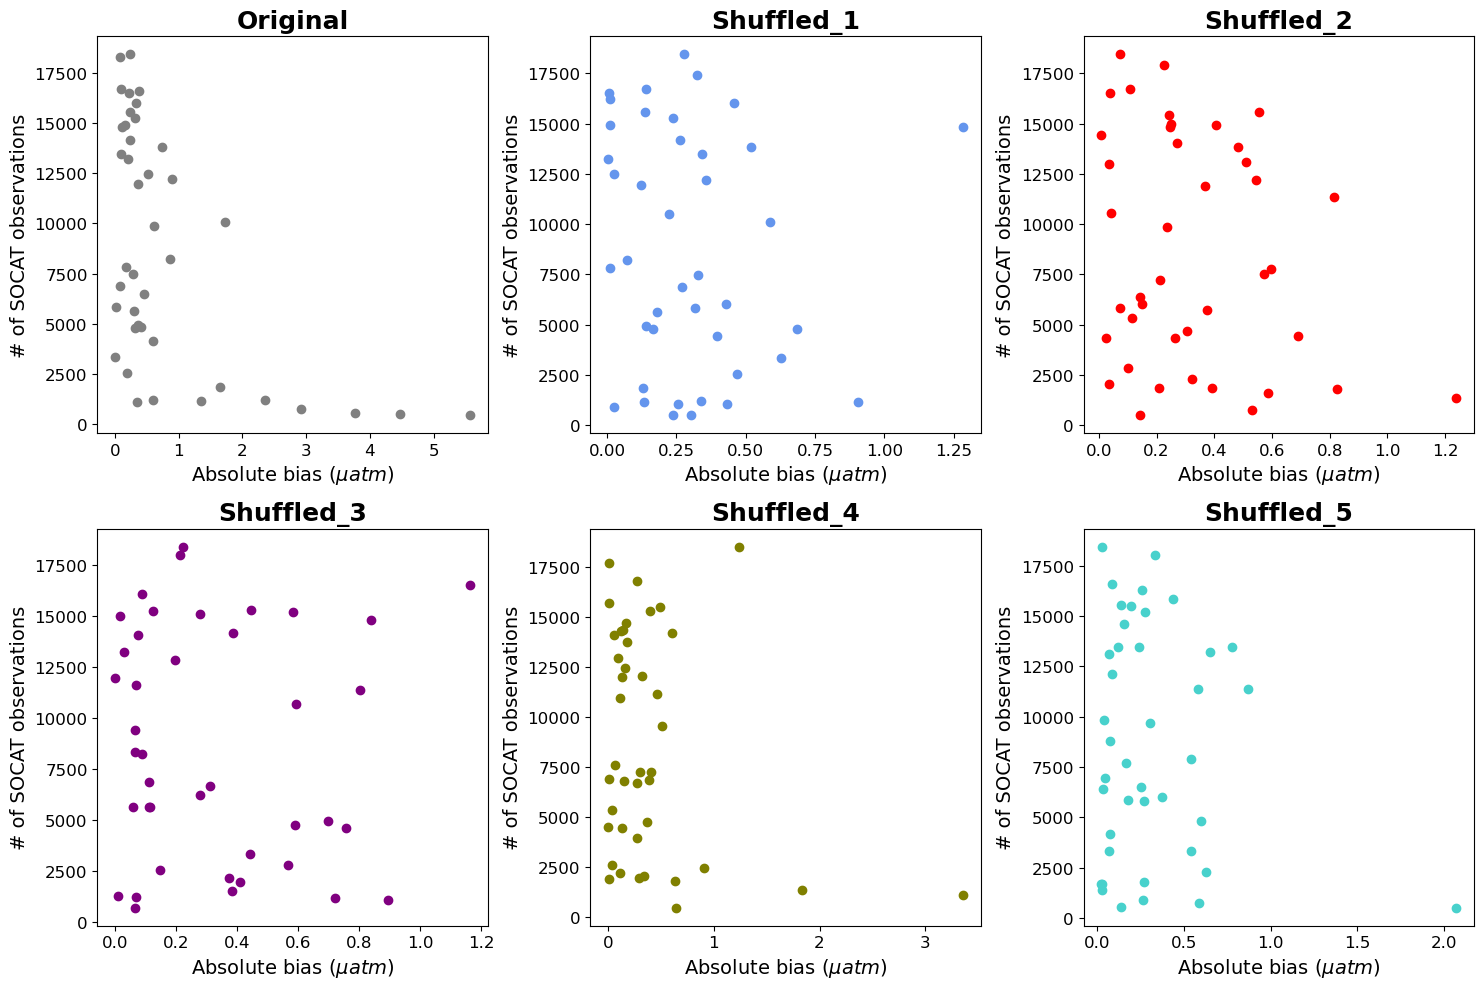

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axes[0, 0].scatter(bias_original_nmse_abs, socat_original_annual, c='gray')
axes[0, 0].set_title('Original', fontsize=18, fontweight='bold')
axes[0, 0].set_xlabel('Absolute bias ($\mu atm$)', fontsize=14)#, fontweight='bold')
axes[0, 0].set_ylabel('# of SOCAT observations', fontsize=14)#, fontweight='bold')
axes[0, 0].tick_params(axis='y', labelsize=12)
axes[0, 0].tick_params(axis='x', labelsize=12)

axes[0, 1].scatter(bias_shuffled1_nmse_abs, socat_shuffled_annual_1, c='cornflowerblue')
axes[0, 1].set_title('Shuffled_1', fontsize=18, fontweight='bold')
axes[0, 1].set_xlabel('Absolute bias ($\mu atm$)', fontsize=14)#, fontweight='bold')
axes[0, 1].set_ylabel('# of SOCAT observations', fontsize=14)#, fontweight='bold')
axes[0, 1].tick_params(axis='y', labelsize=12)
axes[0, 1].tick_params(axis='x', labelsize=12)

axes[0, 2].scatter(bias_shuffled2_nmse_abs, socat_shuffled_annual_2, c='red')
axes[0, 2].set_title('Shuffled_2', fontsize=18, fontweight='bold')
axes[0, 2].set_xlabel('Absolute bias ($\mu atm$)', fontsize=14)#, fontweight='bold')
axes[0, 2].set_ylabel('# of SOCAT observations', fontsize=14)#, fontweight='bold')
axes[0, 2].tick_params(axis='y', labelsize=12)
axes[0, 2].tick_params(axis='x', labelsize=12)

axes[1, 0].scatter(bias_shuffled3_nmse_abs, socat_shuffled_annual_3, c='purple')
axes[1, 0].set_title('Shuffled_3', fontsize=18, fontweight='bold')
axes[1, 0].set_xlabel('Absolute bias ($\mu atm$)', fontsize=14)#, fontweight='bold')
axes[1, 0].set_ylabel('# of SOCAT observations', fontsize=14)#, fontweight='bold')
axes[1, 0].tick_params(axis='y', labelsize=12)
axes[1, 0].tick_params(axis='x', labelsize=12)

axes[1, 1].scatter(bias_shuffled4_nmse_abs, socat_shuffled_annual_4, c='olive')
axes[1, 1].set_title('Shuffled_4', fontsize=18, fontweight='bold')
axes[1, 1].set_xlabel('Absolute bias ($\mu atm$)', fontsize=14)#, fontweight='bold')
axes[1, 1].set_ylabel('# of SOCAT observations', fontsize=14)#, fontweight='bold')
axes[1, 1].tick_params(axis='y', labelsize=12)
axes[1, 1].tick_params(axis='x', labelsize=12)

axes[1, 2].scatter(bias_shuffled5_nmse_abs, socat_shuffled_annual_5, c='mediumturquoise')
axes[1, 2].set_title('Shuffled_5', fontsize=18, fontweight='bold')
axes[1, 2].set_xlabel('Absolute bias ($\mu atm$)', fontsize=14)#, fontweight='bold')
axes[1, 2].set_ylabel('# of SOCAT observations', fontsize=14)#, fontweight='bold')
axes[1, 2].tick_params(axis='y', labelsize=12)
axes[1, 2].tick_params(axis='x', labelsize=12)

plt.tight_layout()
plt.show()
# fig.savefig("/home/jovyan/timeseries_bias_obs_corr.jpg",dpi=300, bbox_inches="tight")

## Figure S5

In [ ]:
df0 = pd.DataFrame(socat_original_annual , index=socat_original_annual .year,columns=['Original'])
df1 = pd.DataFrame(socat_shuffled_annual_1, index=socat_original_annual .year,columns=['Shuffled_1'])
df2 = pd.DataFrame(socat_shuffled_annual_2, index=socat_original_annual .year,columns=['Shuffled_2'])
df3 = pd.DataFrame(socat_shuffled_annual_3, index=socat_original_annual .year,columns=['Shuffled_3'])
df4 = pd.DataFrame(socat_shuffled_annual_4, index=socat_original_annual .year,columns=['Shuffled_4'])
df5 = pd.DataFrame(socat_shuffled_annual_5, index=socat_original_annual .year,columns=['Shuffled_5'])

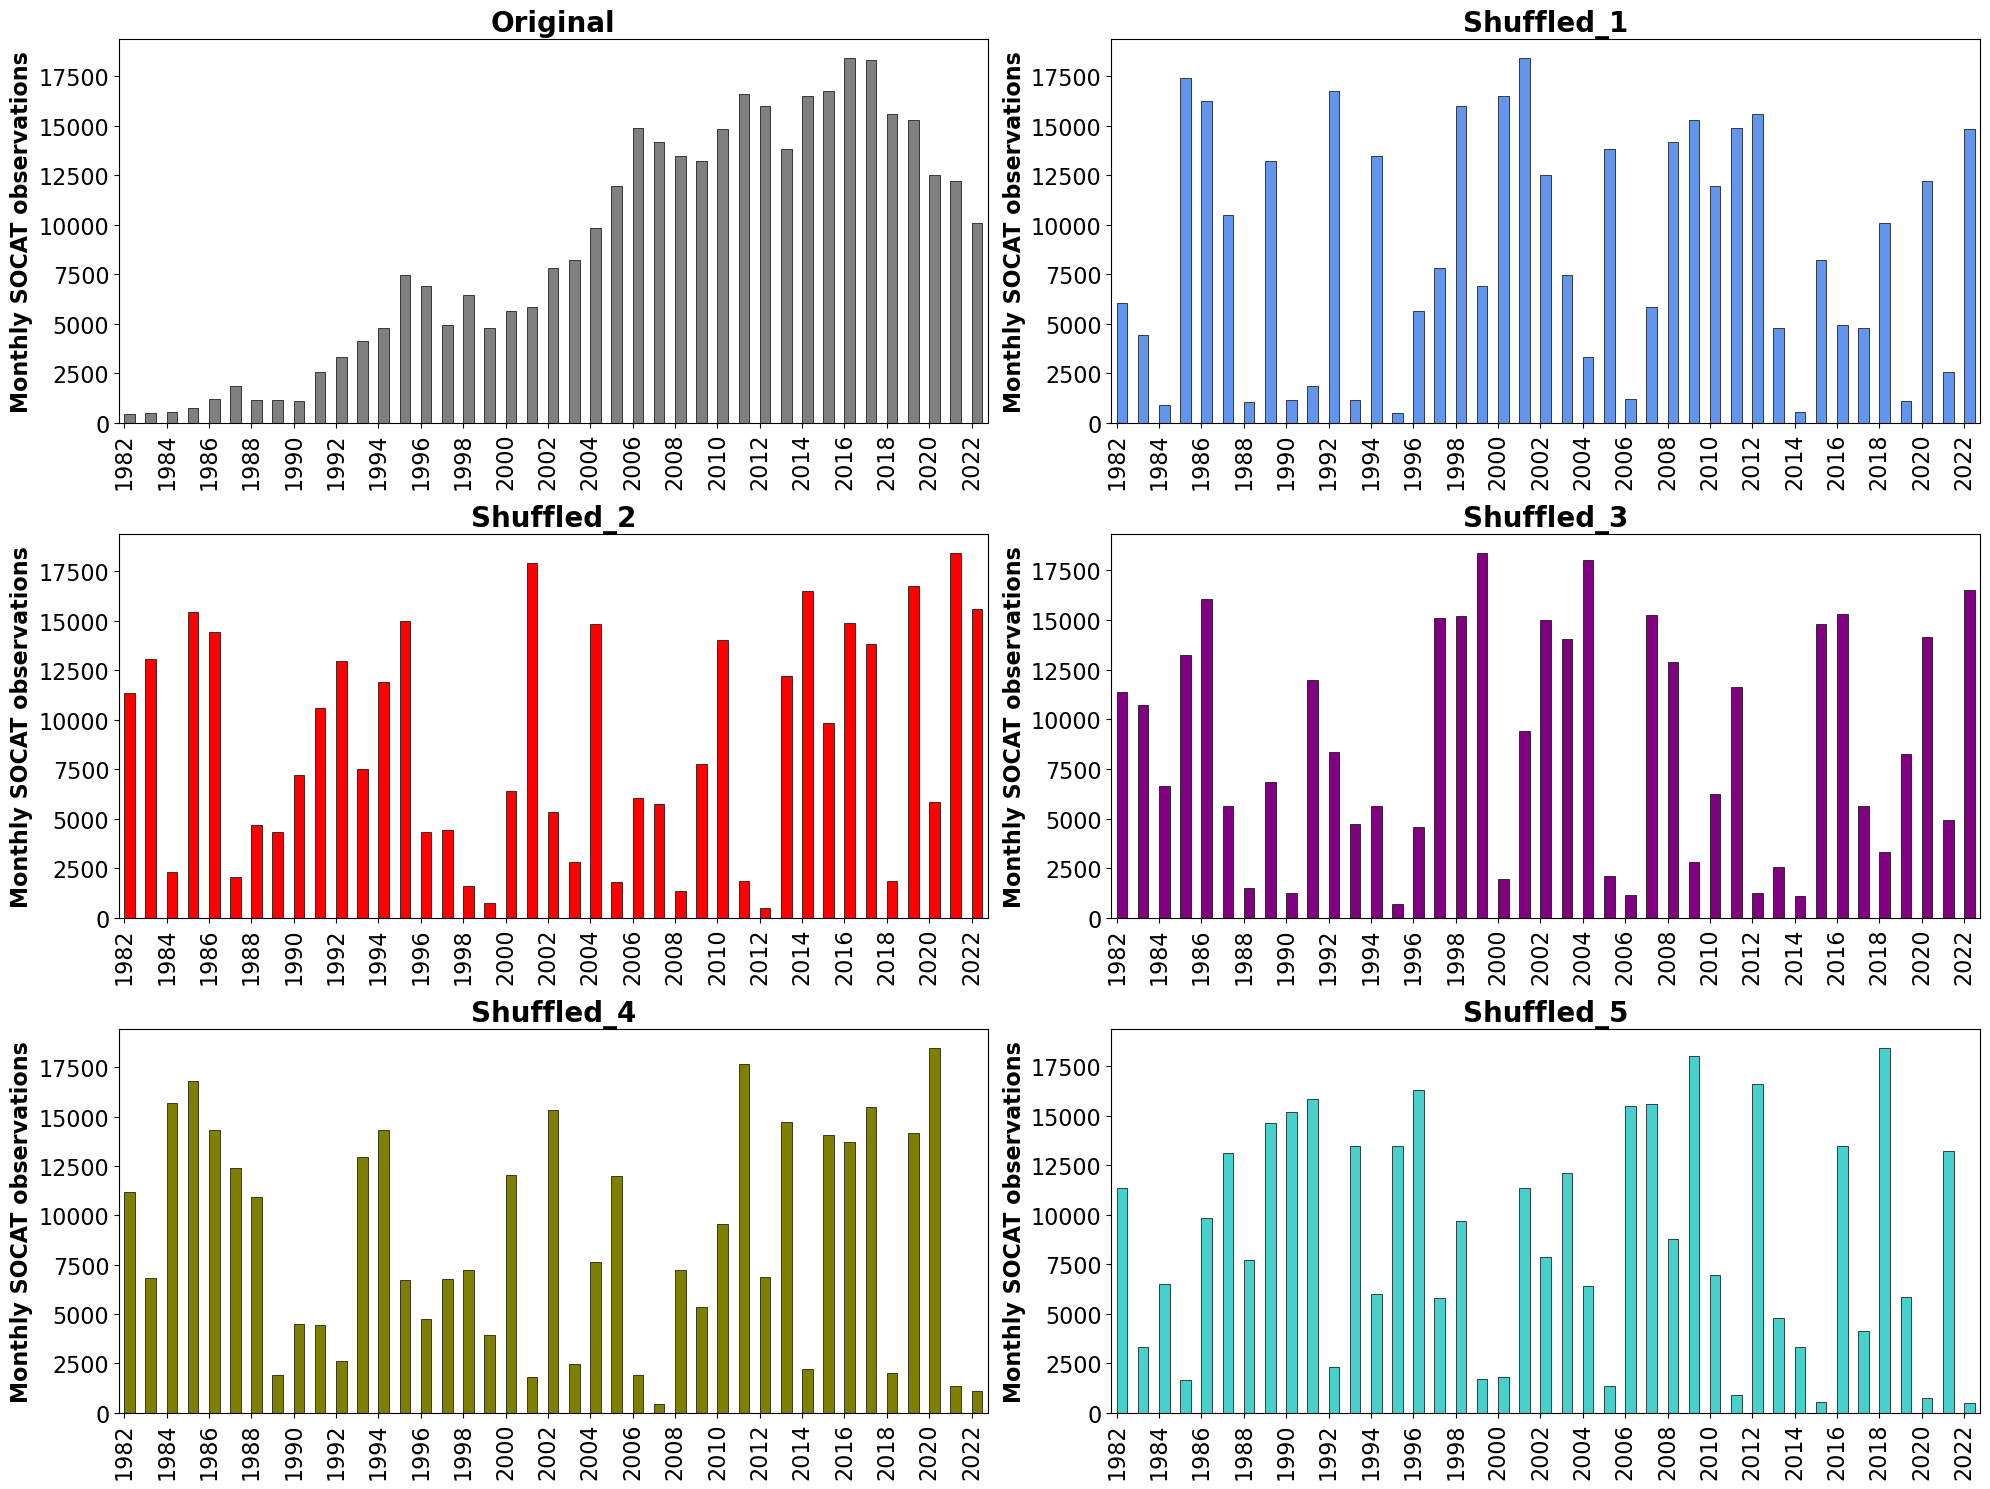

In [33]:
dfs = [df0, df1, df2, df3, df4, df5]
titles = ['Original', 'Shuffled_1', 'Shuffled_2', 'Shuffled_3', 'Shuffled_4', 'Shuffled_5']  

colors = [
    ['gray', 'lightgray', 'darkgray', 'dimgray', 'slategray', 'black'],  
    ['cornflowerblue', 'lightblue', 'royalblue', 'blue', 'navy', 'midnightblue'],  
    ['red', 'lightcoral', 'indianred', 'brown', 'firebrick', 'maroon'],  
    ['purple', 'lightgreen', 'forestgreen', 'limegreen', 'darkgreen', 'seagreen'],  
    ['olive', 'lightpink', 'hotpink', 'deeppink', 'palevioletred', 'crimson'],  
    ['mediumturquoise', 'darkorange', 'coral', 'tomato', 'orangered', 'chocolate']  
]

fig, axes = plt.subplots(3, 2, figsize=(20, 15))  
axes = axes.flatten() 

for i, df in enumerate(dfs):
    df.plot(kind='bar', ax=axes[i], color=colors[i], edgecolor='black', linewidth=0.5, position=0)
    axes[i].set_title(titles[i], fontsize=20, fontweight='bold')
    
    # Display only every other x-tick label
    xticks = axes[i].get_xticks()  # Get current x-ticks
    axes[i].set_xticks(xticks[::2])  # Set only every other x-tick
    axes[i].set_xticklabels(df.index[::2], rotation=90)  # Set the corresponding labels
    
    axes[i].tick_params(axis='x', labelsize=16)
    axes[i].tick_params(axis='y', labelsize=16)
    axes[i].set_ylabel('Monthly SOCAT observations', fontsize=16, fontweight='bold')
    
    # Remove the legend from each subplot
    axes[i].get_legend().remove()

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()
#fig.savefig("/home/jovyan/SOCAT_masks.jpg",dpi=300, bbox_inches="tight")

### pCO2 mean: testbed truth

In [30]:
concat_nmse_9 = xr.concat(datasets_ens_2022_nmse_9, dim='ensemble', join='override') 

In [31]:
testbed_truth_mean = concat_nmse_9.sel(status='truth').mean(['ensemble', 'n_member', 'time', 'ylat', 'xlon'])

In [32]:
testbed_truth_mean.values

array(356.48767622)

### pCO2 mean: testbed sampled by SOCAT masks (original or shuffled)

In [34]:
testbed_truth = concat_nmse_9.sel(status='truth').mean(['ensemble', 'n_member']).drop_vars(['status'])

In [43]:
socat_original['time'] = testbed_truth.time
socat_shuffled_1['time'] = testbed_truth.time
socat_shuffled_2['time'] = testbed_truth.time
socat_shuffled_3['time'] = testbed_truth.time
socat_shuffled_4['time'] = testbed_truth.time
socat_shuffled_5['time'] = testbed_truth.time

In [44]:
fixed_socat_mask = socat_original.socat_mask.where(socat_original.socat_mask==1.)
fixed_socat_mask_shuffle = socat_shuffled_1.socat_mask.where(socat_shuffled_1.socat_mask==1.)
fixed_socat_mask_shuffle_2 = socat_shuffled_2.socat_mask.where(socat_shuffled_2.socat_mask==1.)
fixed_socat_mask_shuffle_3 = socat_shuffled_3.socat_mask.where(socat_shuffled_3.socat_mask==1.)
fixed_socat_mask_shuffle_4 = socat_shuffled_4.socat_mask.where(socat_shuffled_4.socat_mask==1.)
fixed_socat_mask_shuffle_5 = socat_shuffled_5.socat_mask.where(socat_shuffled_5.socat_mask==1.)

In [45]:
original_at_socat = testbed_truth.where(fixed_socat_mask==1.)
shuffle_at_socat = testbed_truth.where(fixed_socat_mask_shuffle==1.)
shuffle2_at_socat = testbed_truth.where(fixed_socat_mask_shuffle_2==1.)
shuffle3_at_socat = testbed_truth.where(fixed_socat_mask_shuffle_3==1.)
shuffle4_at_socat = testbed_truth.where(fixed_socat_mask_shuffle_4==1.)
shuffle5_at_socat = testbed_truth.where(fixed_socat_mask_shuffle_5==1.)

In [46]:
print(original_at_socat.mean().values,shuffle_at_socat.mean().values,
      shuffle2_at_socat.mean().values,shuffle3_at_socat.mean().values,
      shuffle4_at_socat.mean().values,shuffle5_at_socat.mean().values)

369.5757931179597 356.8686415353007 359.5326235150438 357.3996227081516 356.7076963016971 355.42382025897535


### The year of testbed mean

In [47]:
def getting_year_of_mean(testbed_truth,shuffled_recon_at_socat):
    """
    This is getting the month/year that most closely matches the mean pco2 for that reconstruction. 
    """
    
    idx = (np.abs(testbed_truth.mean(['ylat','xlon']) - shuffled_recon_at_socat.mean().values)).argmin()
    closest_to_mean_time = testbed_truth.mean(['ylat','xlon'])[idx.values].time.values

    return closest_to_mean_time

In [48]:
mean_time_full = getting_year_of_mean(testbed_truth,testbed_truth)

In [49]:
# Testbed truth
print(mean_time_full)

2002-03-01T00:00:00.000000000


In [50]:
mean_time_ogmask = getting_year_of_mean(testbed_truth,original_at_socat)
mean_time_shufflemask  = getting_year_of_mean(testbed_truth,shuffle_at_socat)
mean_time_shuffle2mask  = getting_year_of_mean(testbed_truth,shuffle2_at_socat)
mean_time_shuffle3mask  = getting_year_of_mean(testbed_truth,shuffle3_at_socat)
mean_time_shuffle4mask  = getting_year_of_mean(testbed_truth,shuffle4_at_socat)
mean_time_shuffle5mask  = getting_year_of_mean(testbed_truth,shuffle5_at_socat)

In [51]:
# Testbed sampled by SOCAT masks
print(mean_time_ogmask,mean_time_shufflemask,mean_time_shuffle2mask,
      mean_time_shuffle3mask,mean_time_shuffle4mask,mean_time_shuffle5mask)

2012-06-01T00:00:00.000000000 2004-08-01T00:00:00.000000000 2006-07-01T00:00:00.000000000 2004-09-01T00:00:00.000000000 2003-04-01T00:00:00.000000000 2002-03-01T00:00:00.000000000
